# Week 8: User Functions, Files

# 1. User-defined functions in Python

We use a lot of functions when we are programming. But often it is useful to define user's functions. Let's find out how to do that.

``` python
def name_of_the_function(parameters):
  *some instructions*
  return result
```

Above there is the schema for the function creation.
* You need the keyword `def` to define your own function.
* You need to name it with the same restrictions applicable to variables names: you cannot use spaces within the name; the name cannot start with a digit; it should not be the same as the name of existing Python's functions.
* Then in parentheses you specify the number of parameters (arguments) that your function will take and to which local variables they will be assigned.
* Then there is an indented block after the colon where you can specify any instructions you want.
* The line with a keyword `return` is not mandatory, but you will have to write it if you want to use the result of function later (e.g. to assign it to a variable or to use in conditional statement, etc.).
* We shouldn't call a function before defining one! It would lead to an error.

Let's define our very first function.

Our function would be named `currency_converter`. It will take a number as an argument and will assign it to a `rub` variable. It will convert rubles to dollars according to an exchange rate 93 rubles per one dollar.

In [ ]:
def currency_converter(rub): # defining a function
    dollars = rub / 93

my_rubs = 200

print(currency_converter(my_rubs)) # calling a function

Hm, the code above produced nothing. Why? Because we did not get our function to return any result. Maybe we have to print `dollars` variable to get it?

In [ ]:
print(dollars)

An error. The thing is that all the variables that we define within a function are called `local` variables because they don't exist outside of it. So the only way to get something out of function is to `return` it. Let's try adding new line to our function.

In [ ]:
# # How to access local variables in
# # function, outside the function block

# def currency_converter(rub): # defining a function
#     global dollars
#     dollars = rub / 93

# my_rubs = 200

# print(currency_converter(my_rubs)) # calling a function

# print(dollars)

In [ ]:
def currency_converter(rub):
    dollars = rub / 93
    return round(dollars, 2) # return the variable value rounded to 2 digits after the dot

my_rubs = 200
print(currency_converter(my_rubs))

Amazing! We can even assign the result produced by a function to a variable if we need to.

Now let's speak about the parameters. We've specified that our function `currency_converter` takes one argument. What will happen if we try to pass no arguments or two arguments?

In [ ]:
print(currency_converter()) # error saying that 1 argument is required

In [ ]:
print(currency_converter(200, 10)) # error saying that there are too many arguments

So basically when designing a function you specify the number of arguments it will take. You can specify more than one! You can even specify an indefinite amount of arguments. You can read about it [here](https://www.geeksforgeeks.org/args-kwargs-python/#:~:text=The%20special%20syntax%20*args%20in,used%20with%20the%20word%20args.). But once specified you cannot pass different amount of arguments to your function. Too less or too many would lead to an error.

But how does Python know that our argument should be a number? It actually does not. You can try to pass a string to `currency_converter` and Python will throw an error that it cannot divide a string by a float when it comes to a calculation.

In [ ]:
print(currency_converter('100'))

However, in some cases you may end up with functions that will be able to perfrorm the needed instructions to the 'wrong' datatype. So watch for this. Basically, the data type of function arguments is restricted only by the instructions that you specify inside the function.

Assume that you wrote a function that you were planning to use to add two numbers together. However, it will work with two strings and even with two lists since `+` operator can be used for those data types as well.

In [ ]:
def sum_a_b(a, b):
    return a + b

print(sum_a_b(10, 4)) # sums two integers

print(sum_a_b('10', '4')) # concatenates two strings

print(sum_a_b([2, 4], ['cat', 'dog'])) # concatenates two lists

By the way, we've just specified the function that takes two arguments! `sum_a_b` will throw an error if you will try to pass any number of argument that is not two.

We can also specify a **default value** for an argument. In that case that default value would be used if that argument is not passed when calling the function.

In the example `currency_converter_2` takes two arguments — amount of rubles and the exchange rate. If the rate is not passed, then default rate (93) would be used.

In [ ]:
def currency_converter_2(rub, rate=93): # specifying a default value
    return round(rub / rate, 2)

print(currency_converter_2(100, 70))
print(currency_converter_2(100, 30))
print(currency_converter_2(200)) # converting with a default rate

There can be also the functions with no arguments and with no `return` keyword. Such functions are more exotic and are usually used to debug the code or check the progress when running the programs.

In [ ]:
def info():
    print(f'The file was downloaded {cnt} times today')

cnt = 17 # some global variable that would be accessed within a function
info() # not using print() because function returns nothing and prints info by itself

When to define your own function? Sometimes it is just neat to pack lengthy instructions that are expected to be called several times throughout a project into the short name. In other cases we need to define a function to pass it to other functions.

E.g. let's write our own function to use with `map()`. Imagine that we have a list of ages of the respondents to the questionnaire. But some of them by mistake wrote the year of birth. Let's write a function that will check whether the age or YoB was inputted, and then convert the latter in the age by deducting it from the current year.

In [ ]:
def get_age(number):
    if number > 1000: # checking that number is indeed YoB and not age
        return 2025 - number # if yes then calculate the age
    return number # if no then return number (age) unchanged

answers = [26, 2005, 31, 15, 2003]
print(list(map(get_age, answers)))

In the example above we didn't use `else`. We actually could but it would be redundant. When a function hits `return`, it exits, no other code within that function would be executed. That is why we can bypass `else` in this case.

We can also call a function within a function. Let's make our example a bit more complicated. Let's say that we are not interested in the age per se, but rather to see whether the respondent is a minor or not. Let's define the second function that would call `get_age()` within itself.

In [ ]:
def get_age(number): # defining the first function
    if number > 1000:
        return 2025 - number
    return number

def is_minor(age): # defining the second function that does the `minor check`
    if get_age(age) >= 18: # before the comparison function get_age is called
        return 'Not minor'
    return 'Minor'

answers = [26, 2010, 31, 15, 2003]
print(list(map(is_minor, answers)))

## Modules

In the future we will use not only standard Python functions and our very own functions, but we will also import different `modules` — collections of the functions and variables to solve particular problems.

To import a module we use `import` keyword and then specify a module name to import. Sometimes we will have to download the module first, but not now.

Then to call a function or a variable from a module we will have to type a module's name, then put a dot and then call a function. All the functions and variables available in the module we can find in documentation. Below are few examples.

### Module math

Collection of the most basic math functions and variables. Documentation is [here](https://docs.python.org/3/library/math.html).

In [ ]:
import math # importing math

print(math.log(10)) # calling logarithm function from math
print(math.sqrt(10)) # calling square root function
print(math.pi) # calling pi variable

### Module calendar

Collection of the basic calendar and dates related functions and variables. More [here](https://docs.python.org/3/library/calendar.html?highlight=calendar#module-calendar).

In [ ]:
import calendar
print(calendar.weekday(2025,6,9)) # calling a function that
                                  # returns index of day of a week for a given date
# Python is 0 index

### Module string

Formatting string operations and useful string variables. More [here](https://docs.python.org/3/library/string.html?highlight=string#module-string).

Let's do a small example and clean the text from the punctuation symbols using the imported variable that contains all of them.

In [ ]:
import string

print(string.punctuation) # punctiation variable consists all basic punctuation symbols

text = "hi, it's me!" # our text to clean

clean_text = '' # initiating an empty string to store a clean text
for symbol in text:
    if symbol not in string.punctuation: # if the symbol is not a punctuation then add it to the clean_text
        clean_text += symbol

print(clean_text) # print the text without punctuation

# 2. args & kwargs

### *args

- When we are not sure about the number of arguments being passed to a function then we can use *args as function parameter.
- *args allow us to pass the variable number of Non Keyword Arguments to function.
- We can simply use an asterisk * before the parameter name to pass variable length arguments.
- The arguments are always passed as a tuple.
- We can rename it to anything as long as it is preceded by a single asterisk (*). It's best practice to keep naming it args to make it immediately recognizable.

### **kwargs

- \**kwargs allows us to pass the variable number of Keyword Arguments to the function.
- We can simply use an double asterisk ** before the parameter name to pass variable length arguments.
- The arguments are passed as a dictionary.
- We can rename it to anything as long as it is preceded by a double asterisk (\**). It's best practice to keep naming it kwargs to make it immediately recognizable.

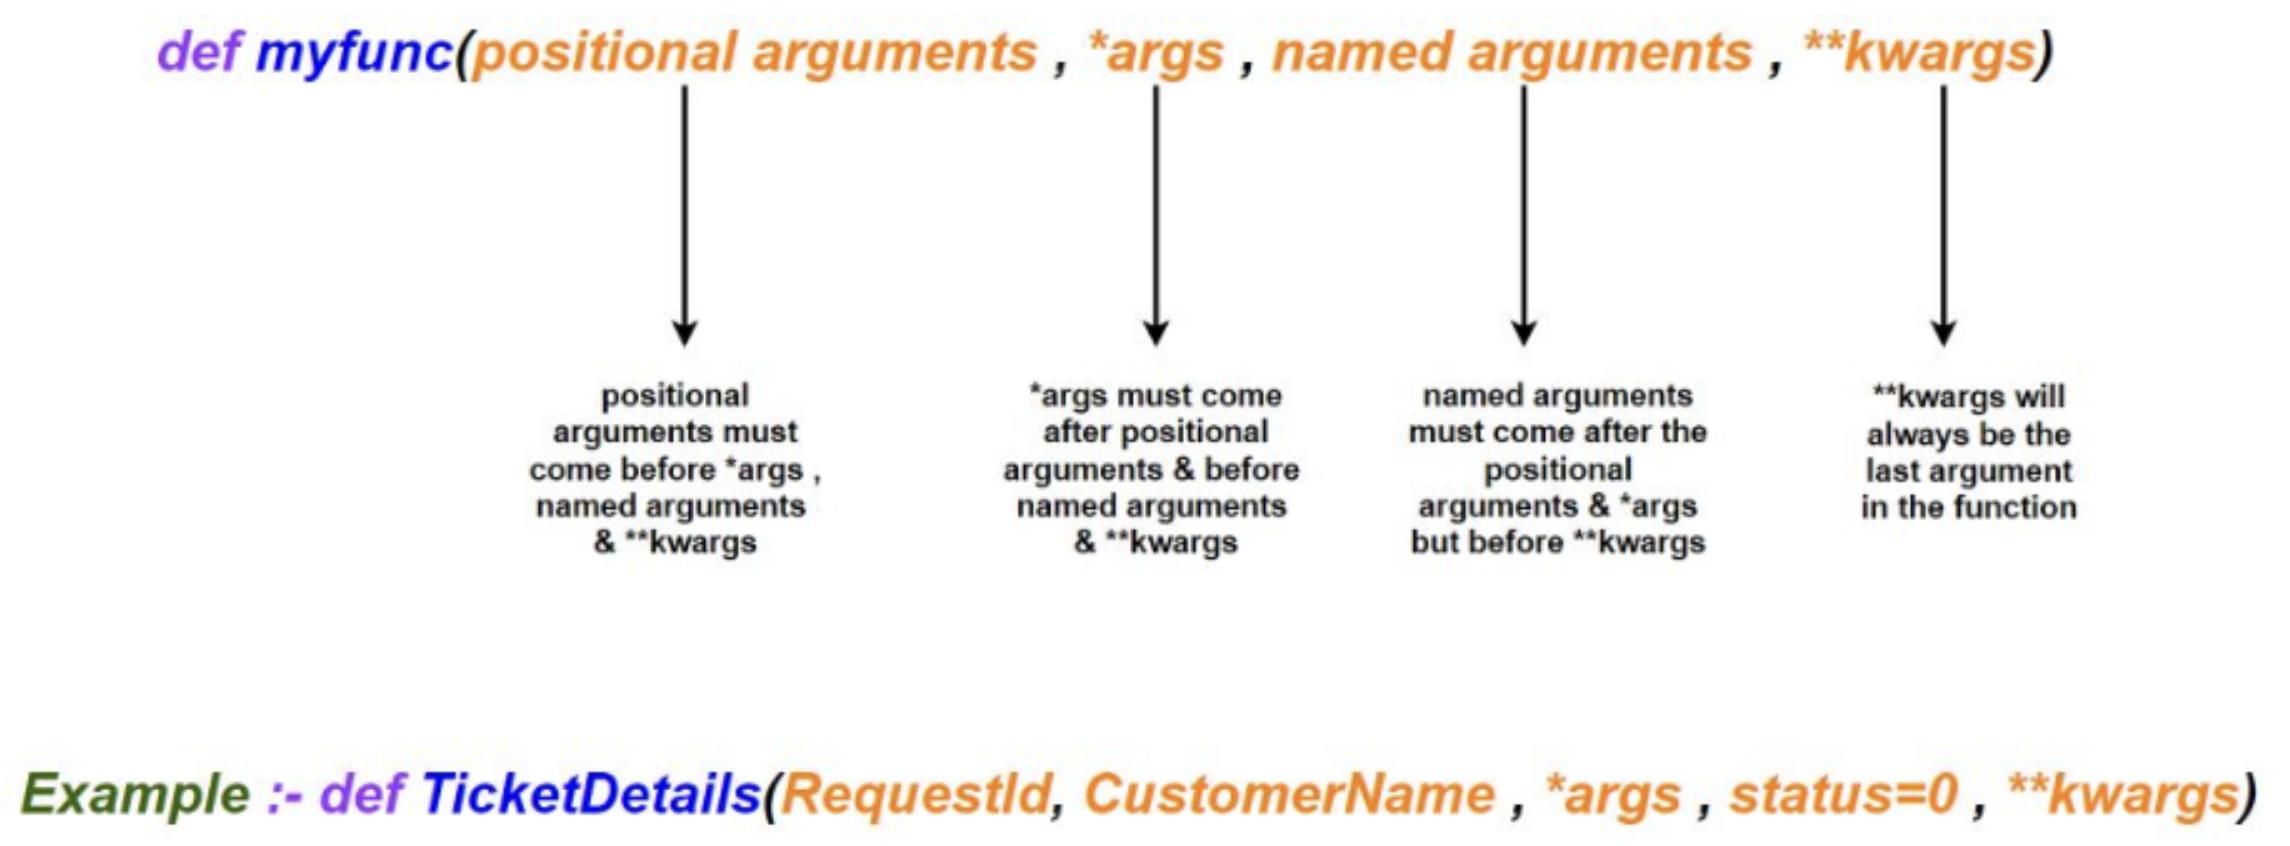

In [ ]:
def add(a, b, c):
    return a+b+c

print(add(10,20,30)) # Sum of three numbers

In [ ]:
'''
This will throw below error as this function will only accept 3 elements.
If we want to make argument list dynamic then *args will come in picture.
'''

print(add(1,2,3,4))

In [ ]:
def some_args(arg_1, arg_2, arg_3):
    print("arg_1:", arg_1)
    print("arg_2:", arg_2)
    print("arg_3:", arg_3)
    
my_list = [2, 3]
some_args(1, *my_list)

In [ ]:
def add1(*args):
    return sum(args)

# *args will take dynamic argument list. So add1() function is open to accept as many arguments.
print(add1(1,2,3))
print(add1(1,2,3,4))
print(add1(1,2,3,4,5))
print(add1(1,2,3,4,5,6))
print(add1(1,2,3,4,5,6,7))

In [ ]:
list1 = [1,2,3,4,5,6,7]
tuple1 = (1,2,3,4,5,6,7)

#tuple & list items will be passed as argument
add1(*list1) , add1(*tuple1)

In [ ]:
list1 = [1,2,3,4,5,6,7]
list2 = [1,2,3,4,5,6,7]
list3 = [1,2,3,4,5,6,7]
list4 = [1,2,3,4,5,6,7]

add1(*list1 , *list2 , *list3 , *list4 )

In [ ]:
'''
For this example we have no idea about the parameters passed e.g 7412, 33
In such cases we can take help of Keyworded arguments (**kwargs).
'''

def UserDetails(*args):
    print(args)

UserDetails('Asif' , 7412 , 41102 , 33 , 'India' , 'Hindi')

In [ ]:
def UserDetails(**kwargs):
    print(kwargs)
    
UserDetails(Name='Asif' , ID=7412 , Pincode=41102 , Age= 33 , Country= 'India', Language= 'Hindi')

In [ ]:
def UserDetails(**kwargs):
    for key, val in kwargs.items():
        print(f"{key} --> {val}")
        
UserDetails(Name='Asif' , ID=7412 , Pincode=41102 , Age= 33 , Country= 'India', Language= 'Hindi')

In [ ]:
# Let's use all four arguments

# UserDetails(Positional argument, *args, Named arguments, **kwargs)
def UserDetails(licenseNo, *args , phoneNo=0 , **kwargs):
    print('License No --> ', licenseNo)
    j = ''
    for i in args:
        j = j+i
    print('Full Name -->', j)
    print('Phone Number --> ', phoneNo)
    for key, val in kwargs.items():
        print(f"{key} --> {val}")

name = ['Asif' , ' ' , 'Ali' , ' ','Bhat']
mydict = {'Name': 'Asif', 'ID': 7412, 'Pincode': 41102, 'Age': 33, 'Country': 'India', 'Language': 'Hindi'}

UserDetails('BHT145' , *name , phoneNo=1234567890, **mydict )

In [ ]:
# *args shouldn't place before **kwargs

def UserDetails(licenseNo, **kwargs, *args):
    print('Nothing')

# 3. Working with Files in Python

Reading and writing data to files using Python is pretty straightforward. To do this, you must first open files in the appropriate mode.

`open()` takes a filename (e.g. some `.txt` file) and a mode as its arguments. `r` opens the file in read only mode. To write data to a file, pass in `w` as an argument instead, to append new text use `a`. In the following syntax, when you're finished with working with the file, you need to close it, applying the corresponding method.

In [ ]:
fh = open('test_file.txt', mode='w') # w - write
fh.write('Hi!')
fh.close()

In [ ]:
fh = open('test_file.txt', mode='a') # a - append
fh.write('How are you?')
fh.close()

Let's try to write several lines into our file using `\n`

In [ ]:
# file handle, infile
fh = open('new_test_file.txt', mode='w')
fh.write('Hi!\n')
fh.write('How are you?\n')
fh.write('Fine! Thank you!')
fh.close()

If you have already some data stored in a list, for example, you may write information into the file using for loop.

In [ ]:
students = ['Anna', 'Maria', 'Alexandra']
fh = open('students.txt', mode='w')
for name in students:
    fh.write(name + '\n')
fh.close()

Usually, it's better to define the encoding which you use for writing/reading the file in order not to get encoding problems. `UTF-8` is one of the most commonly used encodings, and Python often defaults to using it. UTF stands for “Unicode Transformation Format”, and the '8' means that 8-bit values are used in the encoding. (There are also `UTF-16` and `UTF-32` encodings, but they are less frequently used than `UTF-8`.)

In [ ]:
fh = open('students.txt', mode='r', encoding='utf8') # r - reading
x = fh.read()
fh.close()

print(x)

In [ ]:
x

In [ ]:
x = x.strip().split('\n')
print(x)

In [ ]:
fh = open('students.txt', mode='r', encoding='utf8')
for item in fh:
    print(item, end='')
    print('*'*10)
fh.close()

Here’s an example of how to use Python’s “with open(…) as …” pattern to open a text file and read its contents. It's more convenient to use this snippet of code as you don't need to close the file. “with open(…) as …” context manager will do it automatically.

In [ ]:
with open('students.txt') as fh:
    print(fh.read())

In [ ]:
with open('students.txt') as fh:
    st = fh.readlines()

for item in st:
    print('Name:', item.strip())

In [ ]:
st